Accuracy: 100.0 %

Confusion Matrix:
[[3 0]
 [0 3]]


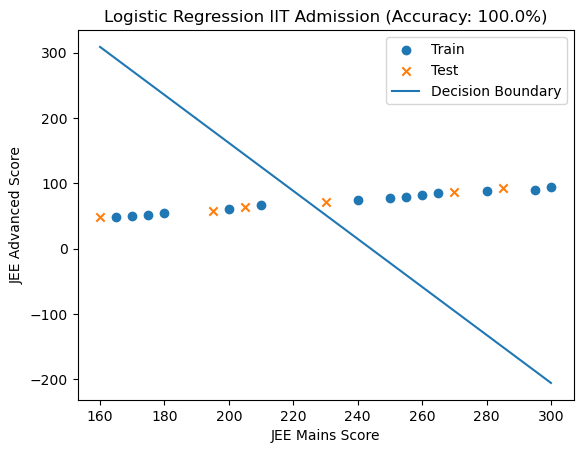

In [22]:
#Implement Logistic Regression by taking dataset and using sklearn
# Dataset i took about JEE mains and advanced score and iit admission
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

data = [
    [270, 87, 1], [250, 78, 1], [260, 82, 1], [180, 55, 0],
    [195, 58, 0], [285, 92, 1], [240, 74, 1], [170, 50, 0],
    [255, 79, 1], [160, 48, 0], [300, 95, 1], [210, 66, 0],
    [205, 63, 0], [295, 90, 1], [280, 88, 1], [175, 52, 0],
    [200, 60, 0], [265, 85, 1], [230, 72, 1], [165, 49, 0]
]

data = np.array(data)
X = data[:, :2]
y = data[:, 2]  

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2
)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Decision boundary
coef = model.coef_[0]
intercept = model.intercept_

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(coef[0] * x_vals + intercept) / coef[1]

# Plot
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', label="Test")
plt.plot(x_vals, y_vals, label="Decision Boundary")

plt.xlabel("JEE Mains Score")
plt.ylabel("JEE Advanced Score")
plt.title(f"Logistic Regression IIT Admission (Accuracy: {acc*100:.1f}%)")
plt.legend()
plt.show()


Accuracy: 85.0 %

Confusion Matrix:
[[10  2]
 [ 1  7]]


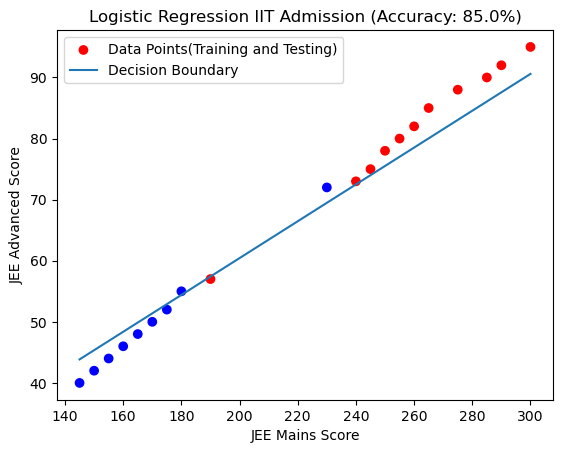

In [28]:
#Implement Logistic Regression by taking dataset but doing it from scratch without using sklearn
import numpy as np
import matplotlib.pyplot as plt
data = np.array([
 
    [300, 95, 1], [290, 92, 1], [285, 90, 1], [275, 88, 1],
    [265, 85, 1], [260, 82, 1], [255, 80, 1], [250, 78, 1],
    [245, 75, 1], [240, 73, 1],
    [180, 55, 0], [175, 52, 0], [170, 50, 0], [165, 48, 0],
    [160, 46, 0], [155, 44, 0], [150, 42, 0], [145, 40, 0],
    [230, 72, 0],  
    [190, 57, 1]   
])

X = data[:, :2]  # features
y = data[:, 2]   # labels

learning_rate = 0.00005
epochs = 25000
m, n = X.shape
weights = np.zeros(n)
bias = 0

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent
for _ in range(epochs):
    linear = np.dot(X, weights) + bias
    y_pred = sigmoid(linear)

    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)

    weights -= learning_rate * dw
    bias -= learning_rate * db

# Predict function
def predict(X):
    return (sigmoid(np.dot(X, weights) + bias) >= 0.5).astype(int)

y_pred_final = predict(X)

# Accuracy
accuracy = np.mean(y_pred_final == y) * 100
print("Accuracy:", round(accuracy, 2), "%")

# Confusion Matrix
tp = np.sum((y_pred_final == 1) & (y == 1))
tn = np.sum((y_pred_final == 0) & (y == 0))
fp = np.sum((y_pred_final == 1) & (y == 0))
fn = np.sum((y_pred_final == 0) & (y == 1))

print("\nConfusion Matrix:")
print(np.array([[tp, fp],
                [fn, tn]]))

# Decision boundary
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(weights[0] * x_vals + bias) / weights[1]

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', label="Data Points(Training and Testing)")
plt.plot(x_vals, y_vals, label="Decision Boundary")
plt.xlabel("JEE Mains Score")
plt.ylabel("JEE Advanced Score")
plt.title(f"Logistic Regression IIT Admission (Accuracy: {accuracy:.1f}%)")
plt.legend()
plt.show()
